In [1]:
import ironman
import numpy as np
import pandas as pd
import corner
import matplotlib.pyplot as plt
import rmfit
from astropy import units as u
from astropy import constants as c
import juliet
from astropy.timeseries import LombScargle

In [2]:
#from matplotlib import rc
#rc('font', **{'family':'sans-serif'}) Use only if you have pdflatex (recommended)
#rc('text', usetex=True)

plt.rcParams['xtick.top'] =  True
plt.rcParams['xtick.direction'] =  'in'
plt.rcParams['xtick.major.width'] =  1.0
plt.rcParams['xtick.minor.width'] =  1.0
plt.rcParams['ytick.right'] =  True
plt.rcParams['ytick.direction'] =  'in'
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.minor.width'] =  1.0
plt.rcParams['lines.markeredgewidth'] =  1.0

In [3]:
dataset = juliet.load(input_folder = 'TOI-2431_juliet_RVGP_HPF_NEID', out_folder = 'TOI-2431_juliet_RVGP_HPF_NEID')
results = dataset.fit(sampler = "dynamic_dynesty")

Detected dynamic_dynesty sampler output files --- extracting from TOI-2431_juliet_RVGP_HPF_NEID/_dynesty_DNS_posteriors.pkl


In [4]:
#results.nested_sampling.results.logz[-1]

In [5]:
P = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['P_p1'])[0]
t0 = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['t0_p1'])[0]
print(P,t0)

0.22419577996128598 2460258.868551538


# Photometry

In [6]:
# def plot_with_gp(instrument, title, name, P, t0):
#     global results
#     x = dataset.times_lc[instrument]
#     phases = juliet.utils.get_phases(dataset.times_lc[instrument], P, t0)
#     transit_plus_GP = results.lc.evaluate(instrument)
#     transit_model = results.lc.model[instrument]['deterministic']
#     gp_model = results.lc.model[instrument]['GP']

#     jitter = np.median(results.posteriors['posterior_samples']['sigma_w_'+instrument]) / 1e6
    
#     mask = np.logical_or(np.logical_and(phases>-0.05,phases<-0.02),np.logical_and(phases<0.05,phases>0.02))
#     #print(mask)
#     oot = (dataset.data_lc[instrument] - gp_model)[mask]
#     m_inst = 1-np.mean(oot)
    
#     # print(x)
#     # print(phases)
#     # print(transit_plus_GP)
#     # print(transit_model)
#     # print(gp_model)
#     # print(jitter)
    
#     #m_inst = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['mflux_'+instrument])[0]
#     transit_model = results.lc.model[instrument]['deterministic']
    
#     fig, ax = plt.subplots(dpi=100)
#     plt.errorbar(phases,dataset.data_lc[instrument]-gp_model+m_inst,yerr = np.sqrt(dataset.errors_lc[instrument]**2.0 + jitter**2.0), fmt = '.', alpha = 0.7)

#     idx = np.argsort(phases)
#     plt.plot(phases[idx],transit_model[idx], color='black',zorder=10)

#     plt.xlim([-0.5,0.5])
#     #plt.ylim([0.98,1.02])
#     plt.title(title)
#     #plt.xlim()
#     #plt.ylim([0.995,1.005])
#     plt.xlabel('Phase')
#     plt.ylabel('Relative flux')
#     plt.show()

#     return phases, dataset.data_lc[instrument], np.sqrt(dataset.errors_lc[instrument]**2.0 + jitter**2.0), transit_model, m_inst, gp_model

In [7]:
# phase_tess, flux_tess, flux_err_tess, model_tess, m_tess, gp_model_tess = plot_with_gp("TESS","TESS","TESS_det.csv",P,t0)

In [8]:
# def bin_lc(phase, f, num_bins=40):
#     # Shift phase from [-0.5, 0.5] to [0, 1] for binning
#     phase = np.mod(phase + 1, 1)

#     # Define bin edges and centers
#     bin_edges = np.linspace(0, 1, num_bins + 1)
#     binned_phase = (bin_edges[:-1] + bin_edges[1:]) / 2
#     binned_flux = np.full(num_bins, np.nan)  # Initialize with NaNs

#     for i in range(num_bins):
#         mask = (phase >= bin_edges[i]) & (phase < bin_edges[i + 1])
#         if np.any(mask):
#             binned_flux[i] = np.mean(f[mask])  # Mean flux in bin

#     # Convert phase back to [-0.5, 0.5] for correct plotting
#     binned_phase = binned_phase - (binned_phase > 0.5)

#     return binned_phase, binned_flux

# fig = plt.figure(figsize=(10,6),dpi=150,constrained_layout=True)

# gs = fig.add_gridspec(3, 6)
# ax1 = fig.add_subplot(gs[:2, :])
# ax2 = fig.add_subplot(gs[2, :], sharex = ax1)

# phase_bin, flux_bin = bin_lc(phase_tess, flux_tess)

# ax1.errorbar(phase_tess*P*24.,flux_tess-gp_model_tess,flux_err_tess,fmt = '.', alpha=0.1,color="cornflowerblue")
# idx = np.argsort(phase_tess)
# ax1.plot(phase_tess[idx]*P*24.,model_tess[idx], color='crimson',zorder=10,lw=2)

# ax1.plot((phase_bin)*P*24.,flux_bin,"o",color="k",zorder=5)

# #ax1.set_ylim()
# plt.setp(ax1.get_xticklabels(), visible=False)
# ax1.set_ylabel('Relative flux',fontsize=14)

# res = flux_tess-gp_model_tess-model_tess

# phase_res_bin, res_bin = bin_lc(phase_tess, res)

# ax2.errorbar(phase_tess*P*24.,res,flux_err_tess,fmt = '.', alpha=0.1,color="cornflowerblue")
# ax2.axhline(0.0,lw=2,color="crimson",zorder=30)
# ax2.plot((phase_bin)*P*24.,res_bin,"o",color="k",zorder=5)

# ax2.set_xlim(-2.5,2.5)
# ax2.set_ylim(-0.008,0.008)
# #ax2.set_xticks([-2,-1,0,1,2,3])
# ax2.set_xlabel(r'Hours from mid-transit',fontsize=14)
# ax2.set_ylabel('O - C', fontsize = 14)

# ax1.tick_params(labelsize=12)
# ax2.tick_params(labelsize=12)

# fig.set_facecolor('w')
# #plt.tight_layout()
# #fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.07),ncol=6, fancybox=True, fontsize=9)
# plt.savefig("TOI-2431_PHOT.png", bbox_inches="tight", dpi=600)
# plt.show()
# plt.close()

# Radial Velocities

In [9]:
dataset.times_rv

{'NEID': array([2460661.69434182, 2460661.83431809, 2460663.81846735,
        2460664.63461503, 2460665.58387257, 2460680.64477062,
        2460680.74655183, 2460685.70225794, 2460725.61728925,
        2460725.62103128, 2460725.67232209, 2460725.6758779 ]),
 'HPF': array([2460673.70990708, 2460712.60662992, 2460715.59766566])}

In [10]:
dataset.data_rv

{'NEID': array([ -8.98063907, -21.92102423,  -1.93804619,   6.41213063,
          9.8441314 , -12.13004336,   6.77473854,   4.61035712,
         -1.36241563,  -6.29403621, -16.34462272, -11.34680843]),
 'HPF': array([-25.17060598,  13.29367368,   5.9441003 ])}

In [11]:
#Define time range for model evaluation
min_time, max_time = np.min(dataset.times_rv["NEID"]) - 10, np.max(dataset.times_rv["NEID"]) + 10
model_times = np.linspace(min_time, max_time, 10000)

jitter = 0

In [12]:
full_model, components = results.rv.evaluate("NEID", t = model_times, GPregressors = model_times, return_components = True)

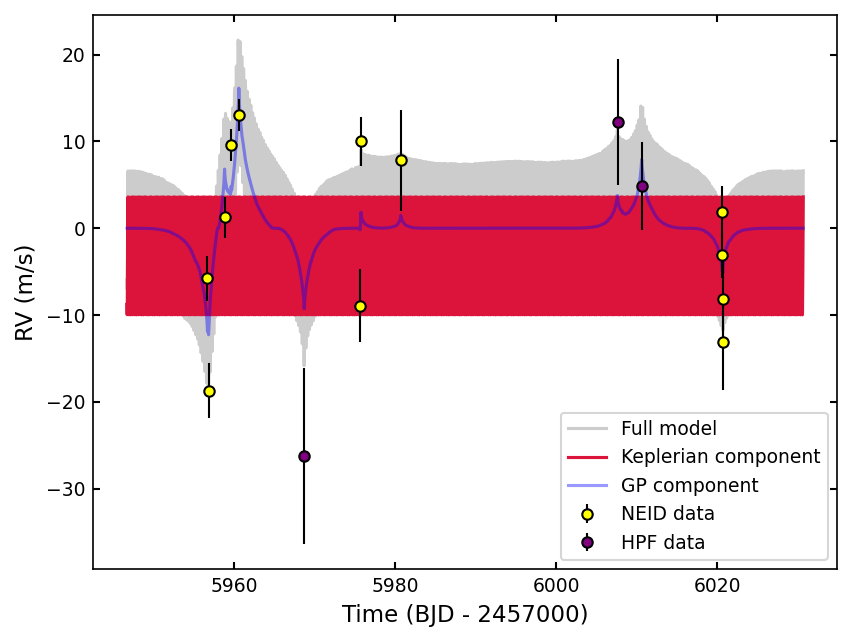

In [13]:
fig, ax = plt.subplots(dpi=150)

instruments = ["NEID", "HPF"]
colors = ["yellow", "purple"]

####################################################### For Data Plotting #######################################################

for instrument, color in zip(instruments,colors):
    plt.errorbar(dataset.times_rv[instrument]-2454705,dataset.data_rv[instrument] - components['mu'][instrument], \
                 yerr = dataset.errors_rv[instrument], fmt = 'o', label = instrument+' data',mec='black', mfc = color, ecolor = "black", \
                 elinewidth=1, zorder = 100)

###################################################### For Model Plotting ######################################################
plt.plot(model_times-2454705,full_model - components['mu']["NEID"],label='Full model',alpha = 0.2,color='black')
plt.plot(model_times-2454705,results.rv.model['deterministic'],label = 'Keplerian component', color = 'crimson')
plt.plot(model_times-2454705,results.rv.model['GP'], label = 'GP component', alpha = 0.4, color='blue')

plt.xlabel("Time (BJD - 2457000)", fontsize=11)
plt.ylabel("RV (m/s)", fontsize=11)
plt.legend()
plt.show()

In [14]:
def get_vals(vec):
    fvec   = np.sort(vec)

    fval  = np.median(fvec)
    nn = int(np.around(len(fvec)*0.15865))

    vali,valf = fval - fvec[nn],fvec[-nn] - fval
    return fval,vali,valf
    
def print_mass_radius_rho_sma_planet(rstar=1.0, rstar_err=0.1, mstar=1.0, mstar_err=0.1, r_units=u.Rjup, sma_units=u.AU, m_units=u.Mjup):
    """
    Calculate and print the planet's mass, radius, density, and semi-major axis. If r_star and/or m_star are not sampled they must be added as inputs

    Parameters:
    rstar (float) optional: Mean stellar radius in solar radii. Only if r_star not sampled
    rstar_err (float) optional: Error in stellar radius. Only if r_star not sampled
    mstar (float) optional: Mean stellar mass in solar masses. Only if m_star not sampled
    mstar_err (float) optional: Error in stellar mass. Only if m_star not sampled
    r_units (Astropy Unit): Desired output units for the planet's radius.
    sma_units (Astropy Unit): Desired output units for the semi-major axis.
    m_units (Astropy Unit): Desired output units for the planet's mass.
    """
    # chain = self.fit.chain
    Rs = np.random.normal(rstar, rstar_err, len(results.posteriors['posterior_samples']['K_p1'])) * u.Rsun
    Ms = np.random.normal(mstar, mstar_err, len(results.posteriors['posterior_samples']['K_p1'])) * u.Msun

    rp = results.posteriors['posterior_samples']['p_p1'] * Rs
    rp = rp.to(r_units)
    r_planet_val, r_planet_down, r_planet_up = get_vals(rp.value)
    print(f"R_planet: {r_planet_val:.4f} +{r_planet_up:.4f} -{r_planet_down:.4f} {r_units}")

    P_sec = results.posteriors['posterior_samples']['P_p1'] * u.day
    P_sec = P_sec.to(u.s)
    aRs = (((P_sec**2 * c.G * Ms) / (4 * np.pi**2))**(1/3))
    sma = aRs.to(sma_units)
    sma_val, sma_down, sma_up = get_vals(sma.value)
    print(f"Sma_planet: {sma_val:.4f} +{sma_up:.4f} -{sma_down:.4f} {sma_units}")

    K = results.posteriors['posterior_samples']['K_p1'] * u.m / u.s
    e = 0
    cos_inc = (results.posteriors['posterior_samples']['b_p1'] * Rs) / sma
    cos_inc = np.clip(cos_inc, -1, 1)
    inc = np.arccos(cos_inc)
    inc_val, inc_down, inc_up = get_vals(inc.value)
    print(f"Inclination: {np.degrees(inc_val):.4f} +{np.degrees(inc_up):.4f} -{np.degrees(inc_down):.4f} deg")
    #inc = 73.83677068878853 * np.pi / 180.0  # Convert to radians
    mp = K * np.sqrt(Ms * sma * (1 - e**2) / c.G) / np.sin(inc)
    mp = mp.to(m_units)
    m_planet_val, m_planet_down, m_planet_up = get_vals(mp.value)
    print(f"M_planet: {m_planet_val:.4f} +{m_planet_up:.4f} -{m_planet_down:.4f} {m_units}")

    dens = (3 * mp / (4 * np.pi * rp**3)).to(u.g / u.cm**3)
    dens_val, dens_down, dens_up = get_vals(dens.value)
    print(f"Rho_planet: {dens_val:.4f} +{dens_up:.4f} -{dens_down:.4f} g/cm^3")

In [15]:
print_mass_radius_rho_sma_planet(rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)

R_planet: 1.5328 +0.0347 -0.0333 earthRad
Sma_planet: 0.0063 +0.0001 -0.0001 AU
Inclination: 73.7761 +1.0560 -1.0299 deg
M_planet: 5.0979 +1.6077 -1.5483 earthMass
Rho_planet: 7.7645 +2.5382 -2.3950 g/cm^3


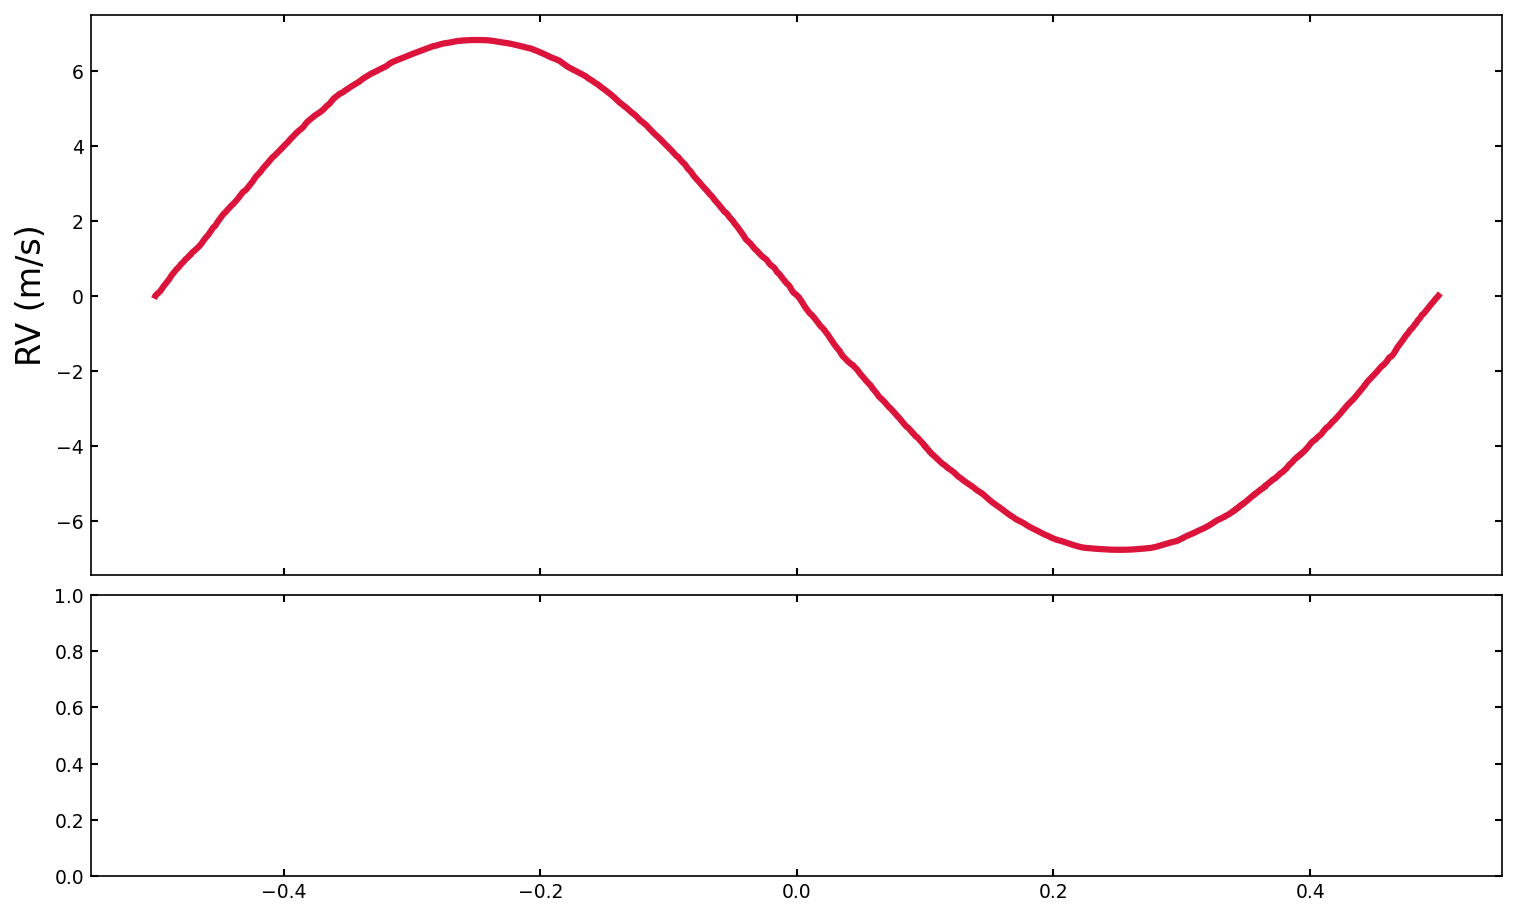

In [19]:
fig = plt.figure(figsize=(10,6),dpi=150,constrained_layout=True)

gs = fig.add_gridspec(3, 6)
ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :], sharex = ax1)

###################################################### For Model Plotting ######################################################

phase_model = (((model_times-t0 + 0.5*P) % P)/P) - 0.5
phase_neid = (((dataset.times_rv["NEID"]-t0 + 0.5*P) % P)/P) - 0.5
phase_hpf = (((dataset.times_rv["HPF"]-t0 + 0.5*P) % P)/P) - 0.5

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel('RV (m/s)',fontsize=16)

idx = np.argsort(phase_model)

ax1.plot(phase_model[idx],results.rv.model['deterministic'][idx]- components['mu']["NEID"],label = 'Keplerian component', color = 'crimson', lw = 3)

####################################################### For Data Plotting #######################################################



plt.show()

In [ ]:
results.rv.model